In [1]:
import os
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\morris simons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
"""To get avgtime from the data traning"""
with open ("log.txt", "r") as f:
    x = f.read()
x = [int(float(i)) for i in x.split(",") if i != ""]
avg_time = sum(x)/len(x)
print(f"how many records in log: {len(x)}")
print(f"this is avg time: {avg_time:1f}".format(round(avg_time,2)))
print(f"the amount of max combinations when brutforceing: {36**5:,}")

how many records in log: 1247
this is avg time: 26.591820
the amount of max combinations when brutforceing: 60,466,176


In [3]:
image_files = glob.glob(os.path.join(config.DEPLOYMENT_DATA, "*.png"))
print(config.DEPLOYMENT_DATA)
targets_orig = [x.split("/")[-1][9:14] for x in image_files]
targets = [[c for c in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]
lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)
for target in targets:
    print(target)
targets_enc = [lbl_enc.transform(x) for x in targets]
target_enc = np.array(targets_enc) + 1
(
    train_imgs,
    test_imgs,
    train_targets,
    test_targets,
    train_orig_targets,
    test_orig_targets
    ) = model_selection.train_test_split(
    image_files,
    target_enc,
    targets_orig,
    test_size=0.1,
    random_state=42
)
train_dataset = dataset.ClassificationDataset(
    image_paths=train_imgs,
    targets=train_targets,
    resize=(config.IMAGE_HEIGHT,
            config.IMAGE_WIDTH
            ),)
#lbl_enc.classes_ = [c for c in lbl_enc.classes_ if c != "\\"]

./testdata/
['0', '0', 'u', 'x', 'c']
['0', '4', 'd', 'm', 'x']
['0', '9', '0', 'y', 'l']
['0', 'f', '3', 's', 'b']
['1', 'a', '9', 'x', 'v']
['1', 'd', 't', '4', 'p']
['1', 'g', '1', 'v', 'e']
['2', 'f', '4', 'i', 'a']
['2', 'i', '6', 'x', 'o']
['2', 'm', 'd', '3', 'g']
['2', 'z', '9', 'r', 'x']
['2', 'z', 'u', 'a', '9']
['3', '6', '7', 'e', 'c']
['3', '7', 'r', 'f', 'k']
['3', 'i', 'v', 'n', 'l']
['3', 'k', '6', 'g', 'l']
['3', 'v', 'q', 'o', 'd']
['3', 'w', 'u', '7', 'f']
['4', '5', 'd', '0', '9']
['4', 'h', 'q', 'h', 'n']
['4', 'j', '1', 'w', 'v']
['5', '8', 'e', 's', 'b']
['5', 'i', '2', '8', 'v']
['5', 'n', 'm', 'k', 'v']
['5', 's', 'n', 'd', 'j']
['6', '8', 'y', '6', 'f']
['6', '9', '2', '4', 'm']
['6', 'o', 't', 'q', 'j']
['6', 'r', '6', 'p', '4']
['6', 'r', 's', 'y', 'm']
['7', '1', 'z', 'a', '4']
['7', '6', 'c', 'm', 'u']
['7', 'f', 'z', '1', 'p']
['7', 't', 'e', '5', 's']
['7', 'y', 'v', '8', 'y']
['8', '0', 'w', 's', 'g']
['8', '1', '9', 'j', 'o']
['8', 'e', 'm', 'i', 'n']


In [4]:
"""To get Number of classes or unique characters from the data"""
print(len(lbl_enc.classes_))
print(lbl_enc.classes_)

36
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h'
 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [5]:
npimg = train_dataset[20]["images"].numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


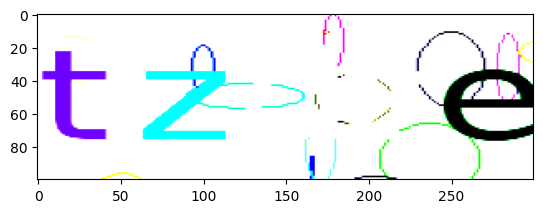

In [6]:
plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [7]:
npimg = train_dataset[7]["images"].numpy()

In [8]:
npimg.shape

(3, 100, 300)